# Data Preprocessing

## Imports

In [1807]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1808]:
data = pd.read_csv('fake_job_postings.csv')

## Exploring our dataset and  seeing if there are missing values

In [1809]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [1810]:
data.shape

(17880, 18)

In [1811]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [1812]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


## Checking the missing values and see which column has a null value

In [1813]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [1814]:
data=data.drop(['department','company_profile','description','benefits','requirements'],axis=1)

## Counting the Total Number of the missing values

In [1815]:
# We See Here.. That The Total Number of The Missing Values is 45342 Value, We Hate Null Values We Have To Clean it !!
data.isnull().sum().sum()

45342

## Dropping all of the missing & duplicate values

In [1816]:
data = data.dropna(how = 'any')

In [1817]:
data.shape

(2108, 13)

In [1818]:
data.head()

,job_id,title,location,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
6,7,Head of Content (m/f),"DE, BE, Berlin",20000-28000,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
10,11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",100000-120000,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",120000-150000,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",100000-120000,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0
31,32,Software Applications Specialist,"US, KS,",50000-65000,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0


In [1819]:
data.drop_duplicates(inplace=True)

## Converting Salary_range to an integer column by taking the mean of both extremes

In [1820]:
new=data['salary_range'].str.split('-',n=1,expand=True)
new.loc[~(new[0].str.isdigit()) , 0] = '0'


new[1]=new[1].fillna('0')
new.loc[~(new[1].str.isdigit()) , 1] = '0'
new

,0,1
6,20000,28000
10,100000,120000
15,120000,150000
23,100000,120000
31,50000,65000
...,...,...
17844,0,0
17849,80000,100000
17865,18000,20000
17867,18000,19000


In [1821]:
#Converting the new columns to int
new[0]=new[0].astype(int)
new[1]=new[1].astype(int)

In [1822]:
#Merging column 0(Min Salary) with column 1(Max salary) into one Column Average_Salary(The mean of both column 1 and 0)
new['Average_Salary']=new[[0,1]].mean(axis=1)
new=new.drop([0,1],axis=1)
new['Average_Salary']=new['Average_Salary'].astype(int)

In [1823]:
#Adding Average_Salary to the original dataset replacing the old column(Salary_Range)
data['Average_Salary']=new['Average_Salary']
data=data.drop('salary_range',axis=1)

<AxesSubplot: xlabel='Average_Salary'>

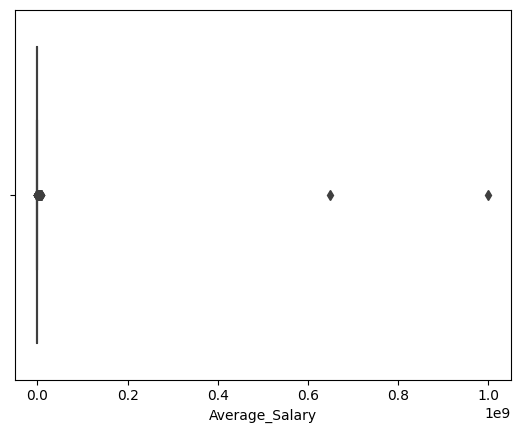

In [1824]:
#Visualization before cleaning
sns.boxplot(data=data, x="Average_Salary")

In [1825]:
#Removing outlier values 
data = data.drop(data[data.Average_Salary < 100].index)
data = data.drop(data[data.Average_Salary > 900000].index)
data

,job_id,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Average_Salary
6,7,Head of Content (m/f),"DE, BE, Berlin",0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,24000
10,11,ASP.net Developer Job opportunity at United St...,"US, NJ, Jersey City",0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,110000
15,16,VP of Sales - Vault Dragon,"SG, 01, Singapore",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,135000
23,24,"Vice President, Sales and Sponsorship (Busines...","US, CA, Carlsbad",0,1,0,Full-time,Executive,Unspecified,Internet,Sales,0,110000
31,32,Software Applications Specialist,"US, KS,",0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,0,57500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,17824,Sales Person Required,"GB, LIN, Immingham",0,0,0,Other,Not Applicable,Unspecified,Staffing and Recruiting,Advertising,1,15000
17849,17850,Communication Designer,"US, CA, San Francisco",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,0,90000
17865,17866,Portfolio Development Associate - Paris & rest...,"GB, LND, London",0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,0,19000
17867,17868,Admin Assistant,"GB, WSX, Chichester",0,1,0,Full-time,Entry level,Unspecified,Human Resources,Sales,0,18500


<AxesSubplot: xlabel='Average_Salary'>

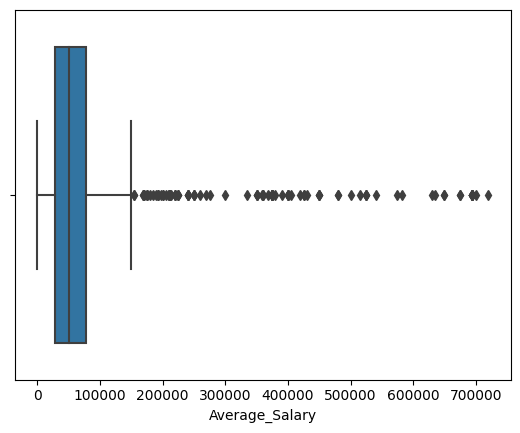

In [1826]:
#Visualization after cleaning
sns.boxplot(data=data, x="Average_Salary")

In [1827]:
#Make sure target(fraudulent) is at the end of the dataframe
tempdata=data['fraudulent']
data=data.drop('fraudulent', axis=1)
data['fraudulent']=tempdata


# Limiting location to country only

In [1828]:
new=data['location'].str.split(',',n=1,expand=True)
new


,0,1
6,DE,"BE, Berlin"
10,US,"NJ, Jersey City"
15,SG,"01, Singapore"
23,US,"CA, Carlsbad"
31,US,"KS,"
...,...,...
17823,GB,"LIN, Immingham"
17849,US,"CA, San Francisco"
17865,GB,"LND, London"
17867,GB,"WSX, Chichester"


In [1829]:
data['location']=new[0]
data

,job_id,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Average_Salary,fraudulent
6,7,Head of Content (m/f),DE,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,24000,0
10,11,ASP.net Developer Job opportunity at United St...,US,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,110000,0
15,16,VP of Sales - Vault Dragon,SG,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,135000,0
23,24,"Vice President, Sales and Sponsorship (Busines...",US,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,110000,0
31,32,Software Applications Specialist,US,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,57500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17823,17824,Sales Person Required,GB,0,0,0,Other,Not Applicable,Unspecified,Staffing and Recruiting,Advertising,15000,1
17849,17850,Communication Designer,US,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Design,90000,0
17865,17866,Portfolio Development Associate - Paris & rest...,GB,0,1,1,Full-time,Entry level,Bachelor's Degree,Real Estate,Sales,19000,0
17867,17868,Admin Assistant,GB,0,1,0,Full-time,Entry level,Unspecified,Human Resources,Sales,18500,0


# Heatmap

C:\Users\khalid\AppData\Local\Temp\ipykernel_21636\2578434383.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

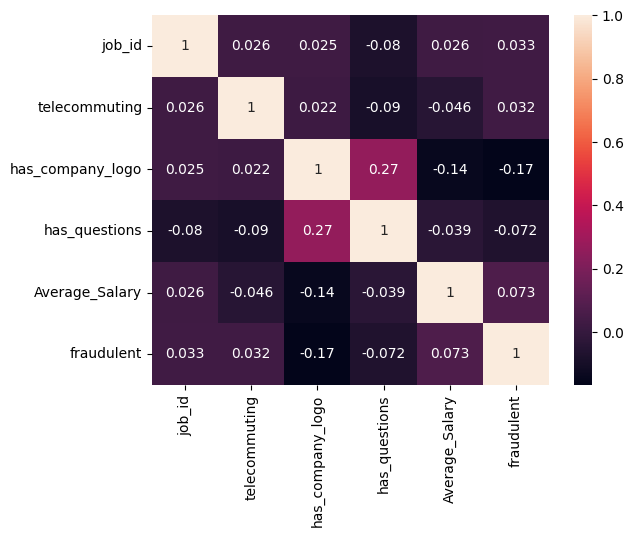

In [1830]:
sns.heatmap(data.corr(),annot=True)

# Distribution of data to be tested

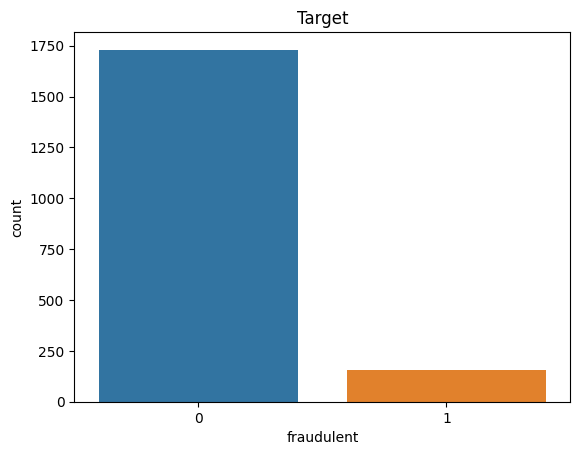

In [1831]:
sns.countplot(data, x='fraudulent').set_title('Target');

In [1832]:
data.head()

,job_id,title,location,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Average_Salary,fraudulent
6,7,Head of Content (m/f),DE,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,24000,0
10,11,ASP.net Developer Job opportunity at United St...,US,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,110000,0
15,16,VP of Sales - Vault Dragon,SG,0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,135000,0
23,24,"Vice President, Sales and Sponsorship (Busines...",US,0,1,0,Full-time,Executive,Unspecified,Internet,Sales,110000,0
31,32,Software Applications Specialist,US,0,1,0,Full-time,Associate,Unspecified,Computer Software,Engineering,57500,0


# One-Hot Encoder


In [1833]:
# One-hot encoding multiple columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

data_encoded=data.copy()
data_encoded = data_encoded.drop(['industry','title'],axis=1)

categorical_cols = ['location', 'employment_type', 'required_experience', 'required_education', 'function']
 
data_encoded=pd.get_dummies(data_encoded, columns=categorical_cols)




# Model Creation

In [1834]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

X = data_encoded.drop(['fraudulent'],axis=1)
y = data_encoded['fraudulent'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [1835]:
X.head()

,job_id,telecommuting,has_company_logo,has_questions,Average_Salary,location_AE,location_AM,location_AT,location_AU,location_BE,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
6,7,0,1,1,24000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,11,0,0,0,110000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,16,0,1,1,135000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
23,24,0,1,0,110000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
31,32,0,1,0,57500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1836]:
y.head()

6     0
10    0
15    0
23    0
31    0
Name: fraudulent, dtype: object

In [1837]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('KNN')
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

KNN
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       524
           1       0.56      0.33      0.42        42

    accuracy                           0.93       566
   macro avg       0.75      0.66      0.69       566
weighted avg       0.92      0.93      0.92       566

[[513  11]
 [ 28  14]]


In [1838]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Random Forest')
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       524
           1       0.91      0.71      0.80        42

    accuracy                           0.97       566
   macro avg       0.94      0.85      0.89       566
weighted avg       0.97      0.97      0.97       566

[[521   3]
 [ 12  30]]


In [1839]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
print('Decision Tree')
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Decision Tree
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       524
           1       0.59      0.69      0.64        42

    accuracy                           0.94       566
   macro avg       0.78      0.83      0.80       566
weighted avg       0.95      0.94      0.94       566

[[504  20]
 [ 13  29]]


# Dealing with the data imbalance using the SMOTE algorithm

In [1840]:
# import library
from imblearn.over_sampling import SMOTE

#Putting target at the end of the dataframe (fraudulent)
tempdata=data_encoded['fraudulent']
data_encoded=data_encoded.drop('fraudulent', axis=1)
data_encoded['fraudulent']=tempdata

FeatureNames = data_encoded.iloc[:, 0 : len(data_encoded.columns) - 1].columns

UnbalancedFeatures = data_encoded.iloc[:, 0 : len(data_encoded.columns) - 1]  
UnbalancedTargets  = data_encoded.iloc[:, len(data_encoded.columns) - 1] 

BalancerSMOTE = SMOTE(random_state = 100)
BalancedFeatures, BalancedTargets = BalancerSMOTE.fit_resample(UnbalancedFeatures, UnbalancedTargets)


BalancedFeatures = pd.DataFrame(BalancedFeatures, columns = FeatureNames)
BalancedTargets  = pd.DataFrame(BalancedTargets, columns = ['fraudulent'])

BalancedDF = BalancedFeatures.merge(BalancedTargets, left_index = True, right_index = True,  how = 'left')

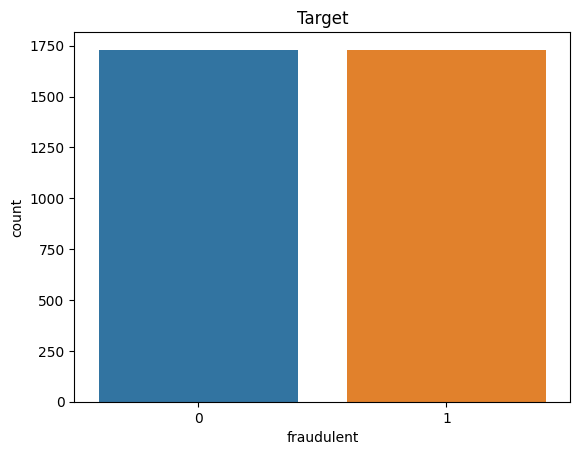

In [1841]:
sns.countplot(BalancedDF, x='fraudulent').set_title('Target');

# Rebuilding the model using the Balanced Dataframe

In [1842]:
X = BalancedDF.drop(['fraudulent'],axis=1)
y = BalancedDF['fraudulent'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [1843]:
X.head()

,job_id,telecommuting,has_company_logo,has_questions,Average_Salary,location_AE,location_AM,location_AT,location_AU,location_BE,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,7,0,1,1,24000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,0,0,0,110000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,1,1,135000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,24,0,1,0,110000,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,32,0,1,0,57500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1844]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: object

In [1845]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print('KNN')
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))

KNN
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       540
           1       0.83      0.90      0.86       498

    accuracy                           0.86      1038
   macro avg       0.86      0.86      0.86      1038
weighted avg       0.86      0.86      0.86      1038

[[449  91]
 [ 52 446]]


In [1846]:
rfc = RandomForestClassifier(n_estimators=100) #n_estimators: The number of trees in the forest.
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print('Random Forest')
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

Random Forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       540
           1       0.98      0.98      0.98       498

    accuracy                           0.98      1038
   macro avg       0.98      0.98      0.98      1038
weighted avg       0.98      0.98      0.98      1038

[[528  12]
 [ 12 486]]


In [1847]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

predictions = dtree.predict(X_test)
print('Decision Tree')
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

Decision Tree
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       540
           1       0.96      0.97      0.97       498

    accuracy                           0.97      1038
   macro avg       0.97      0.97      0.97      1038
weighted avg       0.97      0.97      0.97      1038

[[521  19]
 [ 13 485]]


# Using Cross-Validation to create an even more accurate model

In [1848]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# KNN

In [1849]:
clf = knn.fit(X_train,y_train)
scores = cross_val_score(clf, X, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Accuracy: {:.1f} %".format(scores.mean()*100))

0.80 accuracy with a standard deviation of 0.07
Accuracy: 79.9 %


# Random Forest

In [1850]:
clf = rfc.fit(X_train, y_train)
scores = cross_val_score(clf, X, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Accuracy: {:.1f} %".format(scores.mean()*100))

0.97 accuracy with a standard deviation of 0.03
Accuracy: 97.2 %


# Decision Tree

In [1851]:
clf = dtree.fit(X_train,y_train)
scores = cross_val_score(clf, X, y, cv=10)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Accuracy: {:.1f} %".format(scores.mean()*100))

0.92 accuracy with a standard deviation of 0.12
Accuracy: 91.7 %


# Data Visualization

In [1852]:
import plotly.express as px

In [1853]:
df = pd.read_csv('Results.csv')

In [1854]:
fig= px.scatter(df, x='Data_Used',y='Accuracy',color="Algorithm_Used",title='Comparing the results' )
fig.update_traces(marker={'size': 15})
fig.show()